In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
X, y = load_breast_cancer(return_X_y=True)

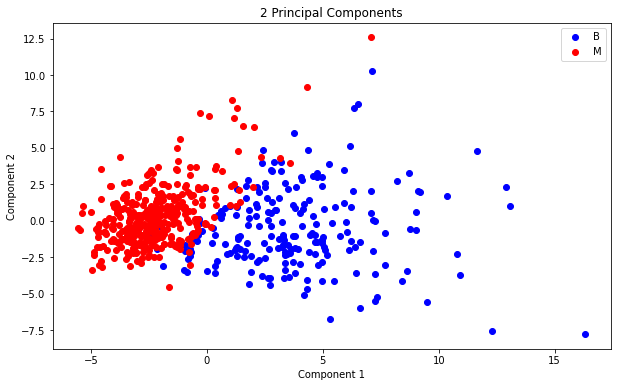

In [4]:
def visualize(X, y):
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111)
    
    pca = PCA(n_components=2)
    scaler = StandardScaler()
    
    X = scaler.fit_transform(X)
    X = pca.fit_transform(X)
    
    for label in [0, 1]:
        mask = y == label
        
        color = 'red' if label else 'blue'
        plt_label = 'M' if label else 'B'
        ax.scatter(X[mask, 0], X[mask, 1], color=color, label=plt_label)
    
    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_title('2 Principal Components')
    plt.legend()

    plt.show()
    
visualize(X, y)

In [9]:
m = Pipeline([('scaler', StandardScaler()), 
              ('pca', PCA(n_components=0.99)),
              ('clf', SVC())])

X_train, X_test, y_train, y_test = train_test_split(X, y)

m.fit(X_train, y_train)

print('TEST PERFORMANCE')
print(classification_report(y_test, m.predict(X_test)))

print('TRAIN PERFORMANCE')
print(classification_report(y_train, m.predict(X_train)))

TEST PERFORMANCE
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        50
           1       0.98      1.00      0.99        93

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.98       143
weighted avg       0.99      0.99      0.99       143

TRAIN PERFORMANCE
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       162
           1       0.99      1.00      0.99       264

    accuracy                           0.99       426
   macro avg       0.99      0.99      0.99       426
weighted avg       0.99      0.99      0.99       426

